In [44]:
# Stdlib
import pickle
from IPython.display import display, Latex
from ast import literal_eval as literal

# Scientific computing
import numpy as np

# Data handling and vis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Miscellaneous
from tabulate import tabulate

# Preprocessing

## Loading and concatenating dataframes

In [45]:
# Small datasets
metadata = {
    "PROJECT_ID": "EMB_ex29",
    "RESEARCHERS": "DK",
    "CURRENT_VERSION": "v2.0.3",
    "DATE": "20230328"
}
TAG = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata)

df = pd.read_csv(f"../../results/dataframes/dataframe_{TAG}.csv")
# df_small = pd.read_csv(f"../../results/dataframes/dataframe_{TAG}.csv")

# # Large datasets
# metadata = {
#     "PROJECT_ID": "EMB_ex29",
#     "RESEARCHERS": "DK",
#     "CURRENT_VERSION": "v1.1",
#     "DATE": "20230322"
# }
# TAG = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata)

# df_large = pd.read_csv(f"../../results/dataframes/dataframe_{TAG}.csv")

# df = pd.concat([df_small, df_large])
# df = df.reset_index()

In [46]:
df

,Unnamed: 0,system,l1,l2,features,theta,intercept,coefficients,accuracy,auroc,aupr
0,0,celegans,1,2,{'imb'},0.05,-0.884204,[0.],0.653846,0.500000,0.673077
1,1,celegans,1,2,{'imb'},0.05,-0.713766,[0.],0.655856,0.500000,0.672072
2,2,celegans,1,2,{'imb'},0.05,-0.610909,[0.],0.657219,0.500000,0.671391
3,3,celegans,1,2,{'imb'},0.05,-0.464306,[0.],0.658970,0.500000,0.670515
4,4,celegans,1,2,{'imb'},0.05,-0.245122,[0.],0.660245,0.500000,0.669877
...,...,...,...,...,...,...,...,...,...,...,...
3075,3075,arxiv,2,6,"{'imb', 'deg', 'emb'}",0.95,-0.545216,[7.76924269 6.83243612],0.852594,0.941141,0.971656
3076,3076,arxiv,2,6,"{'imb', 'deg', 'emb'}",0.95,-0.794275,[7.77627257 7.12732323],0.880631,0.952154,0.977924
3077,3077,arxiv,2,6,"{'imb', 'deg', 'emb'}",0.95,-0.531880,[7.54783702 6.61859757],0.852535,0.943857,0.974443
3078,3078,arxiv,2,6,"{'imb', 'deg', 'emb'}",0.95,-0.356554,[7.94464157 6.81685016],0.856967,0.940319,0.972907


## Pruning

In [47]:
# Drop dummy index
df = df.drop(columns=["Unnamed: 0"])

# Drop rows with missing data
df.dropna(how="any", inplace=True)

## Reindexing and renaming

In [48]:
# Rename layers
df = df.rename(columns={"l1": "alpha", "l2": "beta"})

In [49]:
df.describe()

,alpha,beta,theta,intercept,accuracy,auroc,aupr
count,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000
mean,1.250569,3.002278,0.498975,0.491508,0.784853,0.669716,0.798884
std,0.433412,1.733646,0.284163,1.139949,0.172005,0.271266,0.217811
min,1.000000,2.000000,0.050000,-2.594764,0.000000,0.000000,0.221670
25%,1.000000,2.000000,0.230000,-0.518943,0.660661,0.500000,0.635730
50%,1.000000,2.000000,0.500000,0.586899,0.815385,0.654825,0.894700
75%,2.000000,6.000000,0.770000,1.213109,0.930197,0.938834,0.987955
max,2.000000,6.000000,0.950000,2.985836,1.000000,1.000000,1.000000


# Analysis

## Performance

### One feature

<Figure size 640x480 with 0 Axes>

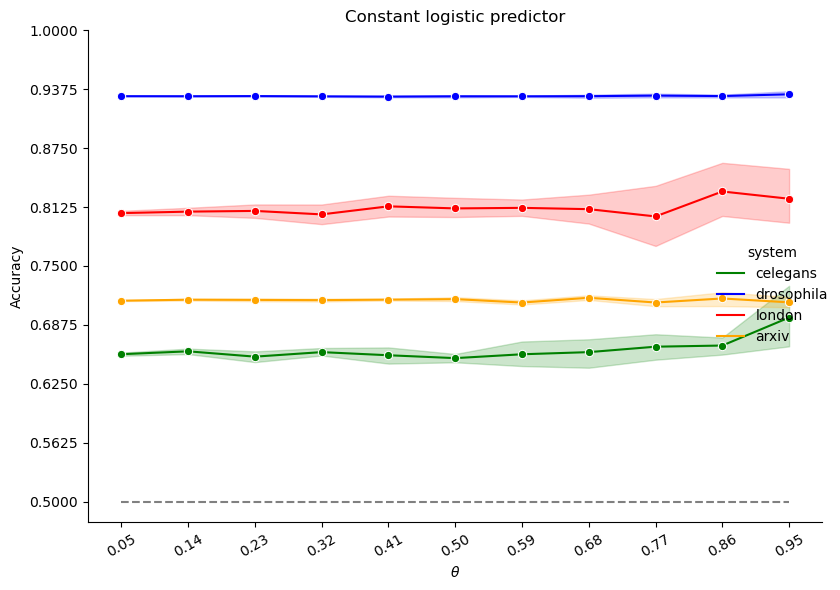

In [50]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[df.features == "{'imb'}"], kind="line",
    x="theta", y="accuracy",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.5, 1, endpoint=True, num=8+1))
plt.ylabel("Accuracy")


# Figure-level attributes
plt.title("Constant logistic predictor")

# Save plot
plt.tight_layout()
# plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-configuration-distance.png", facecolor="white", transparent=False)

<Figure size 640x480 with 0 Axes>

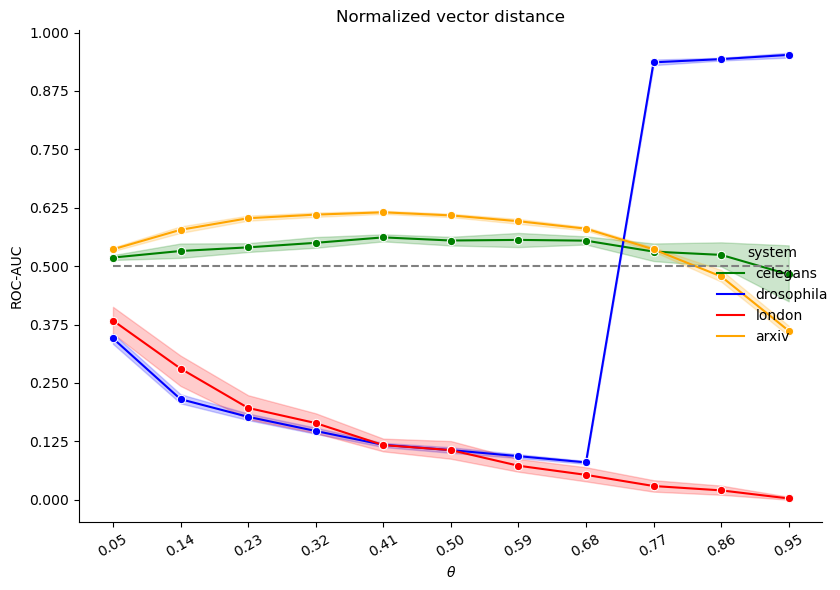

In [51]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[df.features == "{'emb'}"], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.0, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Normalized vector distance")

# Save plot
plt.tight_layout()
# plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-configuration-distance.png", facecolor="white", transparent=False)

<Figure size 640x480 with 0 Axes>

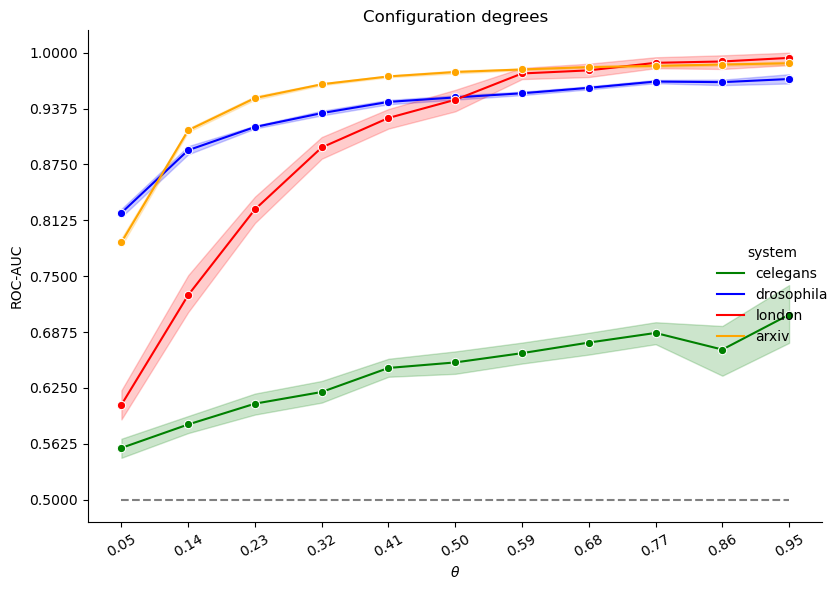

In [52]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[df.features == "{'deg'}"], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.5, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Configuration degrees")

# Save plot
plt.tight_layout()
# plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-configuration-distance.png", facecolor="white", transparent=False)

### Two features

<Figure size 640x480 with 0 Axes>

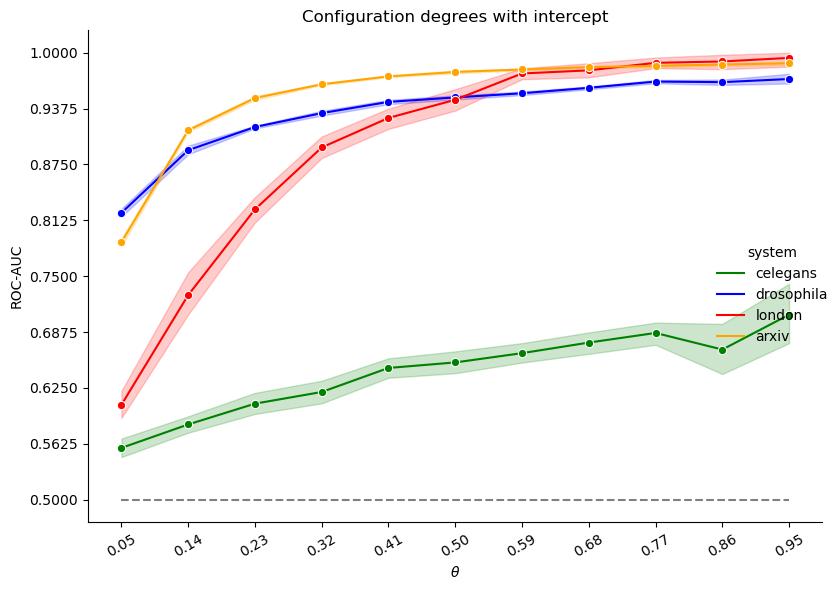

In [53]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[(df.features == "{'imb', 'deg'}") | (df.features == "{'deg', 'imb'}")], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.5, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Configuration degrees with intercept")

# Save plot
plt.tight_layout()
plt.savefig("../../results/plots/line_auroc-pfi_ex29v2.0.3_degrees-intercept.png", facecolor="white", transparent=False)

<Figure size 640x480 with 0 Axes>

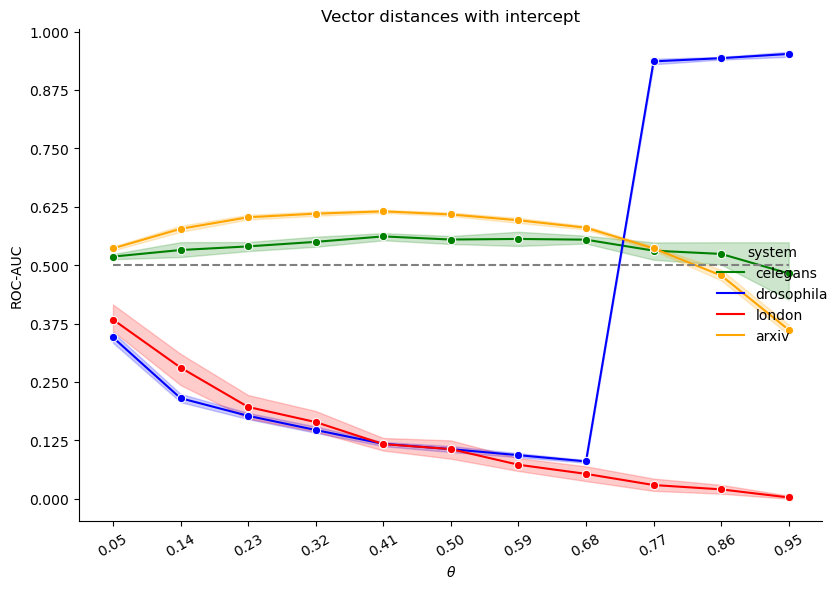

In [54]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[(df.features == "{'emb', 'imb'}") | (df.features == "{'imb', 'emb'}")], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.0, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Vector distances with intercept")

# Save plot
plt.tight_layout()
plt.savefig("../../results/plots/line_auroc-pfi_ex29v2.0.3_distance-intercept.png", facecolor="white", transparent=False)

<Figure size 640x480 with 0 Axes>

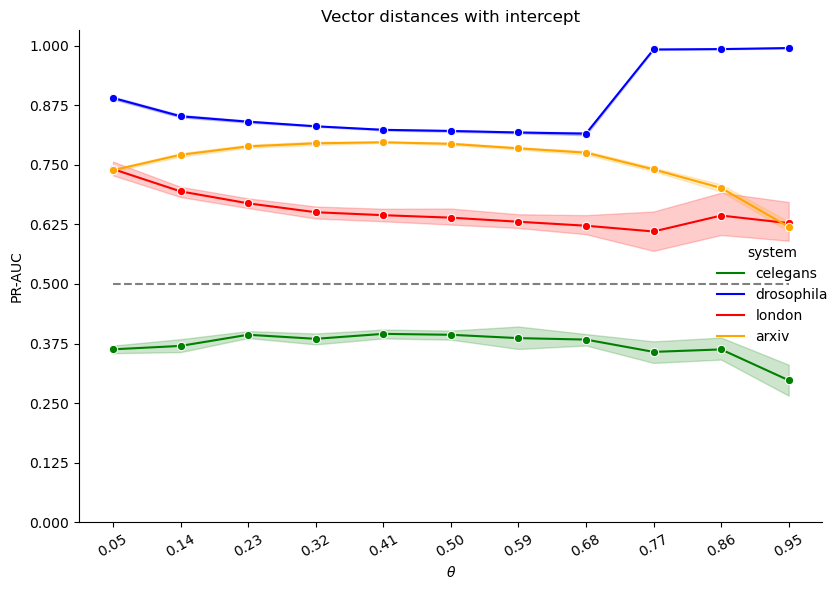

In [62]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[(df.features == "{'emb', 'imb'}") | (df.features == "{'imb', 'emb'}")], kind="line",
    x="theta", y="aupr",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.0, 1, endpoint=True, num=8+1))
plt.ylabel("PR-AUC")


# Figure-level attributes
plt.title("Vector distances with intercept")

# Save plot
plt.tight_layout()
plt.savefig("../../results/plots/line_aupr-pfi_ex29v2.0.3_distance-intercept.png", facecolor="white", transparent=False)

<Figure size 640x480 with 0 Axes>

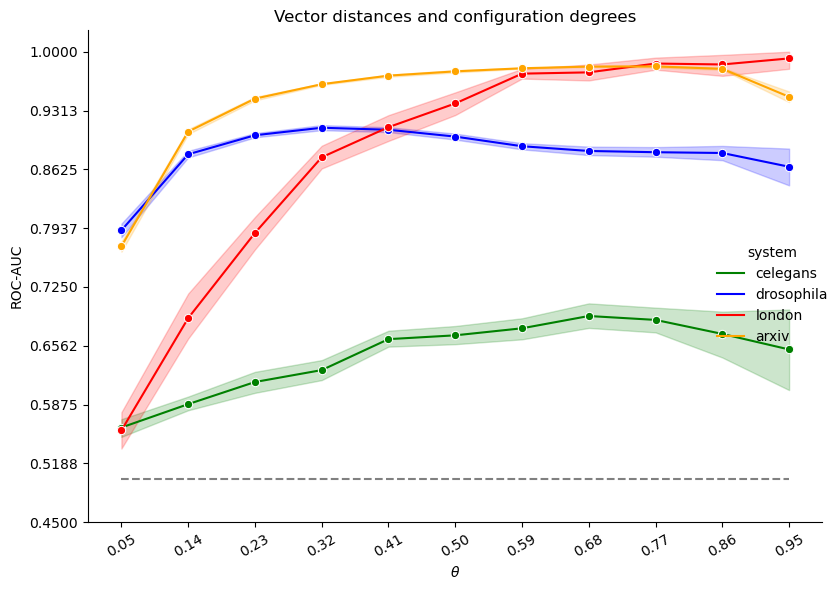

In [56]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[(df.features == "{'emb', 'deg'}") | (df.features == "{'deg', 'emb'}")], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.45, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Vector distances and configuration degrees")

# Save plot
plt.tight_layout()
# plt.savefig("../../results/plots/line_auroc-pfi_ex29v2.0.3_distance-degrees.png", facecolor="white", transparent=False)

### All features

<Figure size 640x480 with 0 Axes>

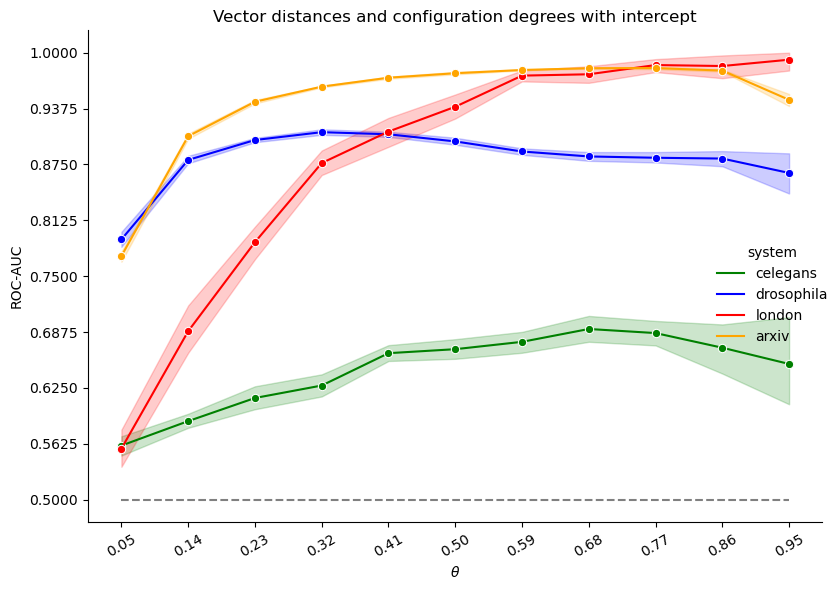

In [61]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[(df.features == "{'emb', 'deg', 'imb'}") | (df.features == "{'imb', 'emb', 'deg'}") | (df.features == "{'imb', 'deg', 'emb'}")], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.5, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Vector distances and configuration degrees with intercept")

# Save plot
plt.tight_layout()
plt.savefig("../../results/plots/line_auroc-pfi_ex29v2.0.3_distance-degrees-intercept.png", facecolor="white", transparent=False)

## Coefficient analysis

In [58]:
df["temp_coefs"] = [x.lstrip("[[ ").rstrip("]]").split(" ") for x in df.coefficients]

In [59]:
df["temp_intercepts"] = [literal(x) for x in df.intercept]

ValueError: malformed node or string: -0.8842035552981479

In [ ]:
[
    float(x)
    for x in df.loc[(df.features == "{'emb', 'deg', 'imb'}") | (df.features == "{'imb', 'emb', 'deg'}")].temp_coefs[135]
    if x != ""
]

[0.21262695, 4.1732494]

TypeError: unhashable type: 'list'

<Figure size 640x480 with 0 Axes>

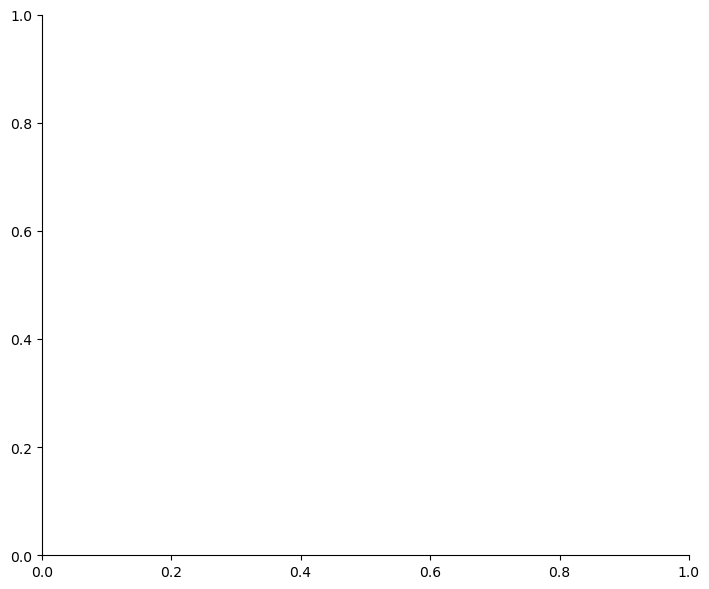

In [ ]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[(df.features == "{'emb', 'deg', 'imb'}") | (df.features == "{'imb', 'emb', 'deg'}")], kind="line",
    x="theta", y="temp_coefs",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.45, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Coefficients")

# Save plot
plt.tight_layout()
# plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-configuration-distance.png", facecolor="white", transparent=False)